In [17]:
import pandas as pd 
import numpy as np 
import seaborn as sns


In [5]:
df = pd.read_csv("Dataset_Abandon_Scolaire.csv")

df.head()

,Age,Sexe,Taux_presence,Nombre_retards,Note_moyenne,Situation_familiale,Abandon
0,21,Femme,89.585023,2,15.826896,Enfants à charge,0
1,20,Homme,70.713068,3,12.829358,Célibataire,0
2,22,Femme,82.122963,1,13.086319,Enfants à charge,0
3,24,Homme,87.408859,3,14.992032,Célibataire,0
4,20,Homme,86.470676,3,12.671649,Marié,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2000 non-null   int64  
 1   Sexe                 2000 non-null   object 
 2   Taux_presence        2000 non-null   float64
 3   Nombre_retards       2000 non-null   int64  
 4   Note_moyenne         2000 non-null   float64
 5   Situation_familiale  2000 non-null   object 
 6   Abandon              2000 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 109.5+ KB


In [8]:
df.shape

(2000, 7)

### *Handling Duplicates:*

In [11]:
df.duplicated().sum()


np.int64(0)

Pas de valeurs duplique

### *Handling NULL Values:*

In [13]:
df.isnull().sum()


Age                    0
Sexe                   0
Taux_presence          0
Nombre_retards         0
Note_moyenne           0
Situation_familiale    0
Abandon                0
dtype: int64

Pas de valeurs NULL / manquantes

### *Handling Outliers:*

In [15]:
df.describe()


,Age,Taux_presence,Nombre_retards,Note_moyenne,Abandon
count,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000
mean,20.5930,84.637016,2.593500,13.441019,0.084000
std,2.0133,7.921973,1.788255,1.809283,0.277457
min,14.0000,59.586369,0.000000,7.615012,0.000000
25%,19.0000,79.279829,1.000000,12.268147,0.000000
50%,21.0000,84.813868,3.000000,13.470242,0.000000
75%,22.0000,90.169016,4.000000,14.688037,0.000000
max,28.0000,100.000000,9.000000,18.833574,1.000000


<Axes: ylabel='Taux_presence'>

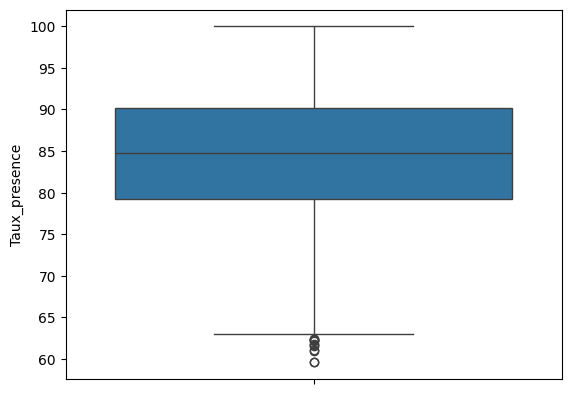

In [19]:
sns.boxplot(df['Taux_presence'])


  - La boîte (box) montre la distribution centrale des données
   - Les moustaches (whiskers) s'étendent jusqu'à 1.5 * IQR (Intervalle Interquartile)
   - Les points au-delà des moustaches représentent les outliers
   - Les outliers dans le taux de présence peuvent indiquer :
     * Des étudiants avec une présence exceptionnellement basse (risque d'abandon)

<Axes: ylabel='Nombre_retards'>

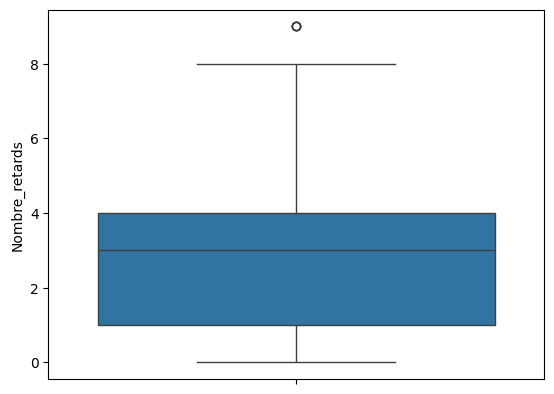

In [20]:
sns.boxplot(df['Nombre_retards'])

- On voit un seul outlier vers le haut qui suggère un étudiants avec un nombre anormalement élevé de retards
- Cet outlier peuvent être un indicateur précoces de risque d'abandon

<Axes: ylabel='Note_moyenne'>

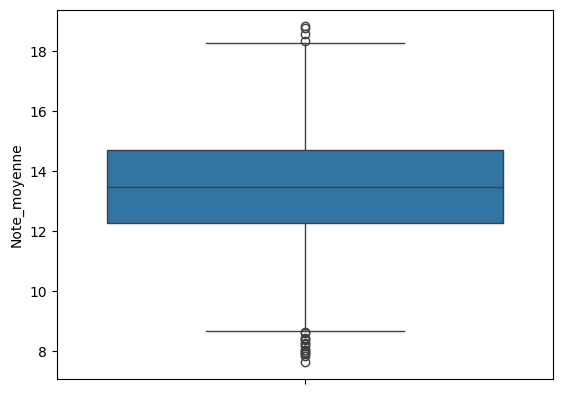

In [21]:
sns.boxplot(df['Note_moyenne'])


   - La distribution des notes moyennes montre la performance académique
   - Les outliers vers le bas peuvent indiquer des étudiants en difficulté
   - Les outliers vers le haut montrent des étudiants exceptionnellement performants

### *Remove outliers*

In [25]:
# Méthode des Quartiles (IQR - Interquartile Range)


# Tauz Presence
Q1 = df['Taux_presence'].quantile(0.25)
Q3 = df['Taux_presence'].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les outliers
df_clean = df[(df['Taux_presence'] >= lower_bound) & (df['Taux_presence'] <= upper_bound)]

#Nombre retards

Q1 = df['Nombre_retards'].quantile(0.25)
Q3 = df['Nombre_retards'].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les outliers
df_clean = df[(df['Nombre_retards'] >= lower_bound) & (df['Nombre_retards'] <= upper_bound)]

#Note moyenne

Q1 = df['Note_moyenne'].quantile(0.25)
Q3 = df['Note_moyenne'].quantile(0.75)
IQR = Q3 - Q1
df_clean = df[(df['Note_moyenne'] >= lower_bound) & (df['Note_moyenne'] <= upper_bound)]




<Axes: ylabel='Taux_presence'>

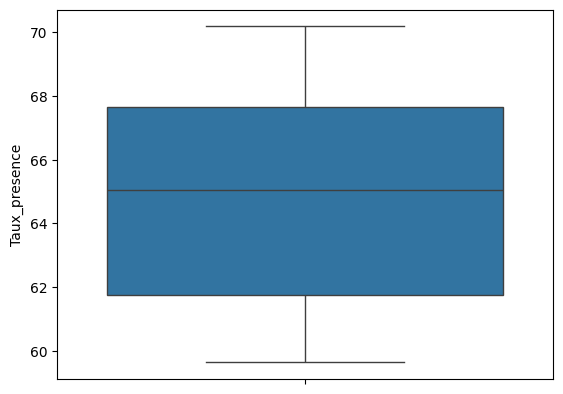

In [26]:
sns.boxplot(df_clean['Taux_presence'])

<Axes: ylabel='Nombre_retards'>

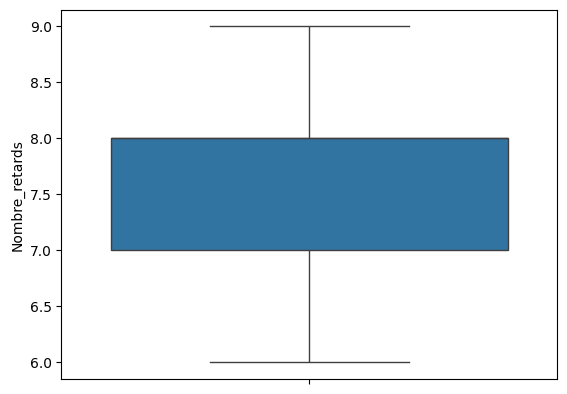

In [27]:
sns.boxplot(df_clean['Nombre_retards'])

<Axes: ylabel='Note_moyenne'>

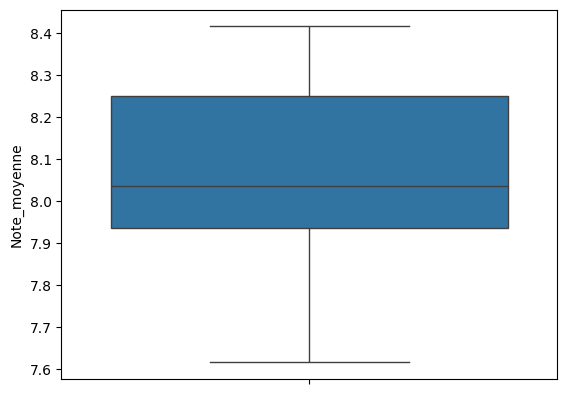

In [28]:
sns.boxplot(df_clean['Note_moyenne'])


In [ ]:
df_clean